In [1]:
# Import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder     
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [2]:
data = pd.read_csv("Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(6362620, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
data1=data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [10]:
data1[data1.duplicated()]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
11104,7,PAYMENT,1849.50,0.0,0.0,0.0,0.0,0,0
33556,8,PAYMENT,7759.31,0.0,0.0,0.0,0.0,0,0
59969,9,PAYMENT,2388.93,0.0,0.0,0.0,0.0,0,0
60763,9,PAYMENT,10042.85,0.0,0.0,0.0,0.0,0,0
63096,9,PAYMENT,2783.83,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
6281481,646,CASH_OUT,10000000.00,10000000.0,0.0,0.0,10000000.0,1,0
6281485,646,CASH_OUT,0.00,0.0,0.0,0.0,0.0,1,0
6351224,702,CASH_OUT,10000000.00,10000000.0,0.0,0.0,10000000.0,1,0
6362455,730,CASH_OUT,10000000.00,10000000.0,0.0,0.0,10000000.0,1,0


In [11]:
data1.reset_index(drop=True)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [12]:
data1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
labelencoder = LabelEncoder()
data["type"] = labelencoder.fit_transform(data["type"])

In [14]:
#Convert the 'nameOrig' column data type to integer data type
data['type']=pd.to_numeric(data['type'],errors='coerce')
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [15]:
data.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

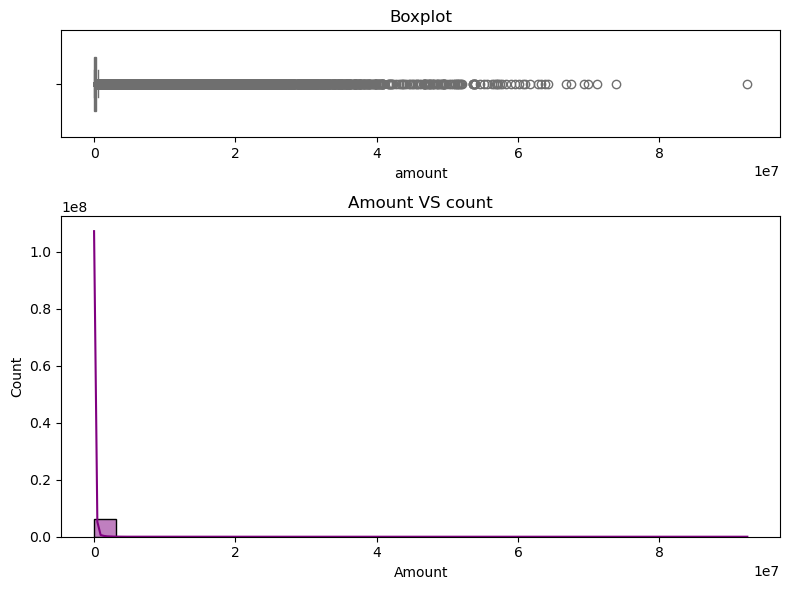

In [16]:
fig, axes = plt.subplots(2,1, figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data1["amount"], ax=axes[0],color='skyblue',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("amount")
sns.histplot(data1["amount"],kde=True, ax=axes[1],color='purple',bins=30)
axes[1].set_title("Amount VS count")
axes[1].set_xlabel("Amount")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Observations
 - there are outliers in right skewed

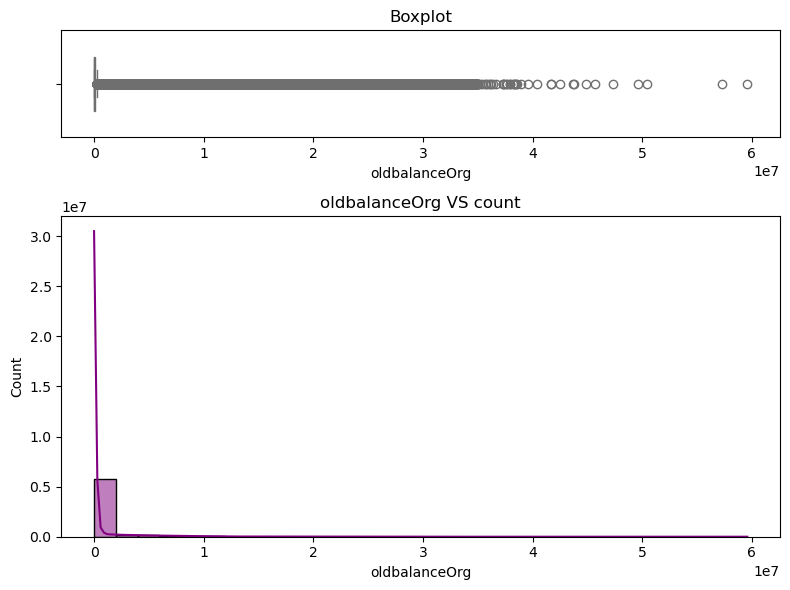

In [18]:
fig, axes = plt.subplots(2,1, figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})

sns.boxplot(data=data1["oldbalanceOrg"], ax=axes[0],color='skyblue',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("oldbalanceOrg")

sns.histplot(data1["oldbalanceOrg"],kde=True, ax=axes[1],color='purple',bins=30)
axes[1].set_title("oldbalanceOrg VS count")
axes[1].set_xlabel("oldbalanceOrg")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

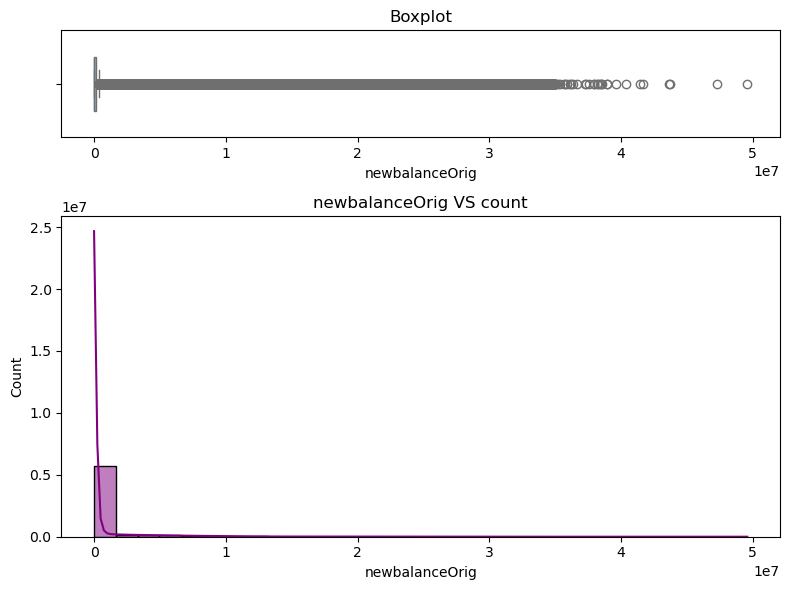

In [19]:
fig, axes = plt.subplots(2,1, figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})

sns.boxplot(data=data1["newbalanceOrig"], ax=axes[0],color='skyblue',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("newbalanceOrig")

sns.histplot(data1["newbalanceOrig"],kde=True, ax=axes[1],color='purple',bins=30)
axes[1].set_title("newbalanceOrig VS count")
axes[1].set_xlabel("newbalanceOrig")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

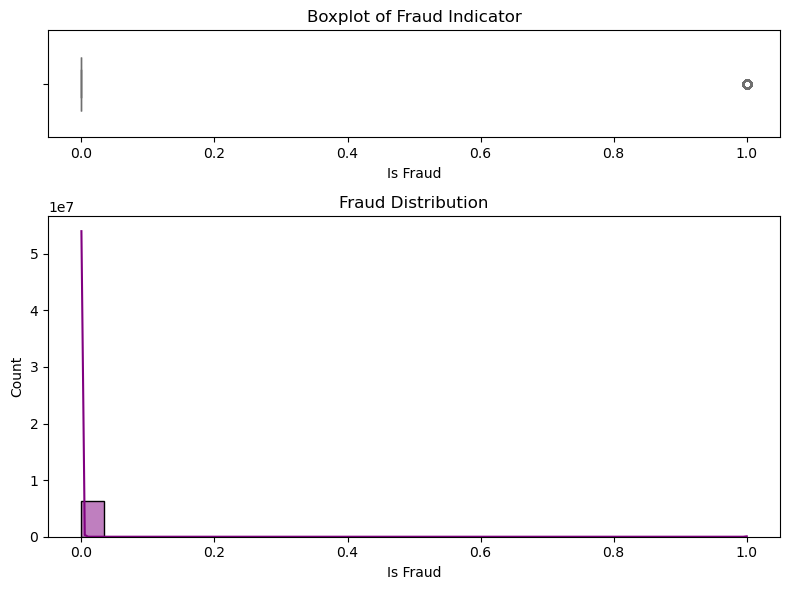

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data["isFraud"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot of Fraud Indicator")
axes[0].set_xlabel("Is Fraud")
sns.histplot(data["isFraud"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Fraud Distribution")
axes[1].set_xlabel("Is Fraud")
plt.tight_layout()
plt.show()

In [21]:
# categorical values
data['type'].value_counts() 

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [22]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Features and target
X = data.drop('isFraud', axis = 1)
Y = data['isFraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.70304158e+00,  9.52399323e-01, -2.81559923e-01, ...,
        -3.23813895e-01, -3.33411405e-01, -1.58577857e-03],
       [-1.70304158e+00,  9.52399323e-01, -2.94767262e-01, ...,
        -3.23813895e-01, -3.33411405e-01, -1.58577857e-03],
       [-1.70304158e+00,  1.69307616e+00, -2.97554804e-01, ...,
        -3.23813895e-01, -3.33411405e-01, -1.58577857e-03],
       ...,
       [ 3.51012348e+00, -5.28954357e-01,  1.01539526e+01, ...,
        -3.03665258e-01,  1.40302700e+00, -1.58577857e-03],
       [ 3.51012348e+00,  1.69307616e+00,  1.10976490e+00, ...,
        -3.23813895e-01, -3.33411405e-01, -1.58577857e-03],
       [ 3.51012348e+00, -5.28954357e-01,  1.10976490e+00, ...,
         1.59138312e+00,  1.66981230e+00, -1.58577857e-03]])

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.82      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906202     149]
 [    435    2000]]


In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# XGBoost Classifier instantiation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV to tune hyperparameters with recall scoring
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

In [ ]:
# Fit the model on your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [ ]:
import joblib
import xgboost as xgb

try:
    model
except NameError:
    model = xgb.XGBClassifier()
    print("Warning: No existing model found. A new XGBoost model has been initialized.")
joblib.dump(model, "fraud_model.pkl")
print("Model saved as fraud_model.pkl")